Assignment 1: write a program to rotate an image by a given angle (in radians) using bilinear interpolation

Start:
* load image
* set rotation angle 

In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("img_example.JPG")

# Set the rotation angle
ang = np.pi/3

# cos, sin
cos = np.cos(ang)
sin = np.sin(ang)

Problem 1: [code by yourself]

Define a function `rotate_img()`, with the following input parameters and return variables:
* img (input): input image as a 3D numpy array of size (H,W,3)
* ang (input): rotation angle in radian
* img_out (output): output image as a 3D numpy array of size (H_out,W_out,3)

This function should include the following processes:
* Define a 2x2 rotation matrix as a numpy array for the given rotation angle 
* Compute output image size and the offset for the output image coordinates by computing the image corner coordinates after rotating the image
* Apply bilinear interpolation when determining the pixel values for the output image 



In [2]:
def rotate_img(img, ang):
  # compute rotation matrix
  rotate_matrix = np.array([[cos, -sin], [sin, cos]])
  # compute output coordinates for image corners
  rotate_matrix = np.array([[cos, -sin], [sin, cos]])
  height, width, channel = img.shape
  corners = np.array([[0, 0], [width, 0], [width, height], [0, height]])
  # compute output image size and offset
  output_corners = np.dot(corners, rotate_matrix)
  
  x_min, y_min = np.min(output_corners, axis=0)
  x_max, y_max = np.max(output_corners, axis=0)

  output_width = int(np.ceil(x_max - x_min))
  output_height = int(np.ceil(y_max - y_min))
  # define output image object
  img_out = np.zeros((output_height, output_width,3), dtype=np.uint8)
  # for each output image coordinate, 
  # compute corresponding original image coordinate
  # get pixel value from original image with interpolation
  offset_x = x_min
  offset_y = y_min
  rot_inv = np.linalg.inv(rotate_matrix)
  
  # 0도, 90도, 180도, 270도, 360도인 경우에는 쌍선형 보간 필요X
  if ang == 0 or ang == np.pi/2 or ang == np.pi or ang == 3*np.pi/2 or ang == 2 * np.pi:
    for y_out in range(output_height):
        for x_out in range(output_width):
            origin_coord = [x_out + offset_x, y_out + offset_y]
            final_coord  = np.dot(origin_coord, rot_inv)
            if np.floor(final_coord[0]) > 0 and np.ceil(final_coord[0]) < width and np.floor(final_coord[1]) > 0  and np.ceil(final_coord[1]) < height:
                img_out[y_out, x_out] = img[int(final_coord[1]), int(final_coord[0])]
  else:
    for y_out in range(output_height):
        for x_out in range(output_width):
            origin_coord = [x_out + offset_x, y_out + offset_y]
            final_coord = np.dot(origin_coord, rot_inv)
            #원좌표로 돌렸을 때 맨 처음의 이미지의 Height, width 내에 있는지 판단하여 안에 있으면 보간 해주고 아니면 그냥 [0,0,0] 값을 유지
            if np.floor(final_coord[0]) > 0 and np.ceil(final_coord[0]) < width and np.floor(final_coord[1]) > 0  and np.ceil(final_coord[1]) < height:
                x_min, x_max, y_min, y_max = int(np.floor(final_coord[0])) , int(np.ceil(final_coord[0])), int(np.floor(final_coord[1])), int(np.ceil(final_coord[1]))
                d1 = abs(final_coord[0] - x_min)
                d2 = abs(x_max - final_coord[0])
                d3 = abs(y_max - final_coord[1])
                d4 = abs(final_coord[1] -  y_min)
                
                pixel1 = ((d1*img[y_max, x_max]+d2*img[y_max, x_min])/(d1+d2))
                pixel2 = ((d1*img[y_min, x_max]+d2*img[y_min, x_min])/(d1+d2))
                
                img_out[y_out, x_out] = (d3*pixel2 + d4*pixel1)/(d3+d4)
  
  return img_out

Show the output:
* use matplotlib

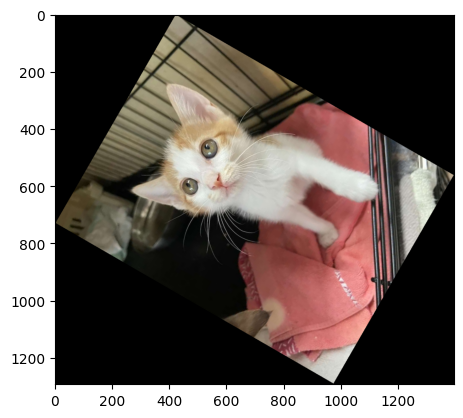

In [3]:
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB format
output = rotate_img(img, ang)

img_out = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(img_out)
plt.show()